In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r"C:\Users\Nadhifa Zahra\Downloads\data_rev_comma_separated.csv")

# 1. Data Understanding

In [4]:
df.sample(15)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,total_pymnt,total_rec_int,default_ind
207617,1341155,1586114,12000,36 months,17.27,10+ years,MORTGAGE,60000.0,credit_card,117xx,NY,1.545.580.467,3455.80,0
363933,17924307,20076828,3900,36 months,16.99,5 years,RENT,53000.0,debt_consolidation,953xx,CA,1570.89,361.01,1
597649,59272050,63159850,35000,60 months,11.53,10+ years,MORTGAGE,300000.0,credit_card,077xx,NJ,3025.03,1263.94,0
528499,63218347,67570161,15050,36 months,19.99,2 years,MORTGAGE,38070.0,medical,376xx,TN,525.81,217.28,0
706265,50566916,53946695,15000,36 months,12.69,2 years,RENT,100000.0,debt_consolidation,280xx,NC,3590.99,1101.23,0
126132,5607649,6989965,7000,36 months,12.12,< 1 year,MORTGAGE,60000.0,debt_consolidation,971xx,OR,7337.28,337.28,0
459236,67379099,72190937,21000,36 months,12.59,5 years,RENT,50000.0,debt_consolidation,933xx,CA,0,0.00,0
104966,6526510,8078594,3000,36 months,15.22,10+ years,MORTGAGE,42000.0,home_improvement,766xx,TX,3025.1,719.76,0
272625,31166364,33739536,28000,36 months,7.69,< 1 year,MORTGAGE,135000.0,other,070xx,NJ,28609.15,609.15,0
448480,10171210,12022622,8500,36 months,12.85,7 years,MORTGAGE,45000.0,debt_consolidation,497xx,MI,6858.92,1560.99,0


In [5]:
df.shape

(855969, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              855969 non-null  int64  
 1   member_id       855969 non-null  int64  
 2   loan_amnt       855969 non-null  int64  
 3   term            855969 non-null  object 
 4   int_rate        855969 non-null  float64
 5   emp_length      812908 non-null  object 
 6   home_ownership  855969 non-null  object 
 7   annual_inc      855969 non-null  float64
 8   purpose         855969 non-null  object 
 9   zip_code        855969 non-null  object 
 10  addr_state      855969 non-null  object 
 11  total_pymnt     855969 non-null  object 
 12  total_rec_int   855969 non-null  float64
 13  default_ind     855969 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 91.4+ MB


# 2. Data Preparation

In [8]:
# Convert total_pymnt string to total_payment float
df['total_payment'] = df['total_pymnt'].str.replace('.','', regex=False).astype(float)

# Convert term string to term_nums float
df['term_nums'] = df['term'].str.replace(' months','', regex=False).astype(float)

# Convert emp_length from object to float
def convert_emp_length(value):
    if pd.isna(value):
        return np.nan
    if '<' in value:
        return 0
    if '10+' in value:
        return 10
    else:
        return int(value.split()[0])
    
df['emp_length_nums'] = df['emp_length'].apply(convert_emp_length)

In [9]:
df.shape

(855969, 17)

In [10]:
cats = ['home_ownership','purpose','default_ind']
nums = ['loan_amnt','term_nums','int_rate','emp_length_nums','annual_inc','total_payment','total_rec_int']
geo = ['zip_code','addr_state']

In [11]:
df.isna().sum()

id                     0
member_id              0
loan_amnt              0
term                   0
int_rate               0
emp_length         43061
home_ownership         0
annual_inc             0
purpose                0
zip_code               0
addr_state             0
total_pymnt            0
total_rec_int          0
default_ind            0
total_payment          0
term_nums              0
emp_length_nums    43061
dtype: int64

In [12]:
print((43061/df.shape[0])*100)

5.030672839787422


Ada sejumlah 43061 value null dalam emp_length_nums. Missing value sejumlah 5 persen dari keseluruhan data, karena total data juga lebih dari 5000 rows maka row dengan nilai null dapat dihapus.

### Duplicate Values

In [15]:
# Duplicate values
duplicates = df.loc[df.duplicated()]

if not duplicates.empty:
    print(duplicates)
else:
    print("There is no duplicate values in this dataset")

There is no duplicate values in this dataset


# 3. Feature Understanding

## Univariate Analysis


In [17]:
df[nums].describe()

,loan_amnt,term_nums,int_rate,emp_length_nums,annual_inc,total_payment,total_rec_int
count,855969.000000,855969.000000,855969.000000,812908.000000,8.559690e+05,8.559690e+05,855969.000000
mean,14745.571335,43.170764,13.192320,6.019334,7.507119e+04,3.040335e+08,1755.046221
std,8425.340005,10.985382,4.368365,3.663588,6.426447e+04,1.217892e+09,2081.692980
min,500.000000,36.000000,5.320000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,36.000000,9.990000,3.000000,4.500000e+04,1.262240e+05,451.270000
50%,13000.000000,36.000000,12.990000,6.000000,6.500000e+04,4.042350e+05,1076.910000
75%,20000.000000,60.000000,15.990000,10.000000,9.000000e+04,1.111748e+06,2233.980000
max,35000.000000,60.000000,28.990000,10.000000,9.500000e+06,9.999728e+09,24205.620000


## Numericals

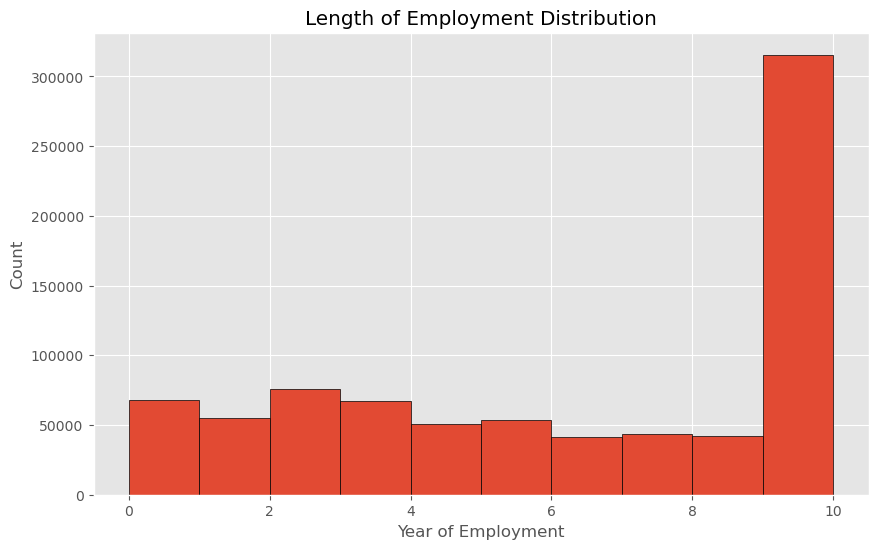

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['emp_length_nums'], bins=10, edgecolor='black')
plt.title('Length of Employment Distribution')
plt.xlabel('Year of Employment')
plt.ylabel('Count')
plt.show()

C:\Users\Nadhifa Zahra\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Nadhifa Zahra\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Nadhifa Zahra\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Nadhifa Zahra\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Nadhifa Zahra\anaconda3\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "

<function matplotlib.pyplot.show(close=None, block=None)>

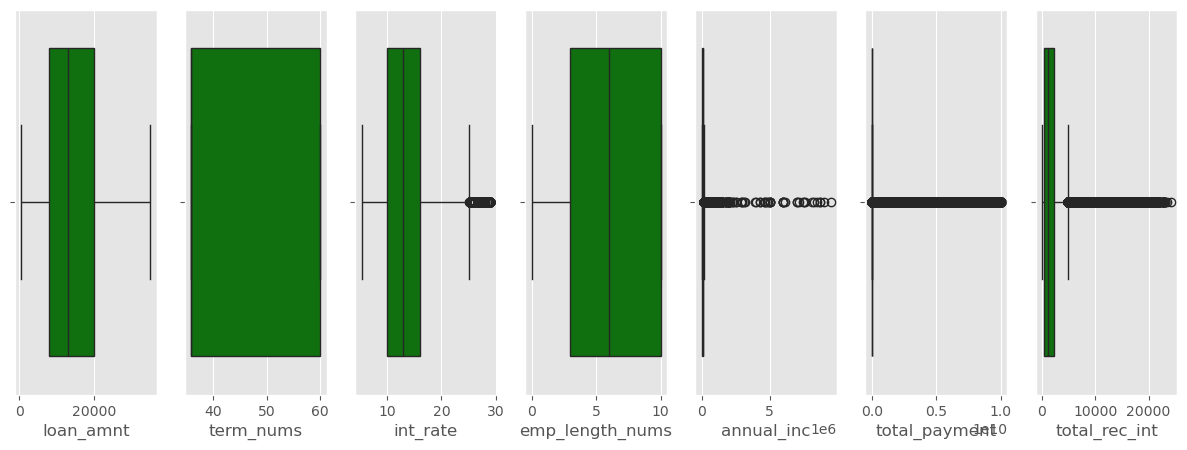

In [20]:
# Numericals Boxplot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(x=df[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    
plt.tight_layout
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

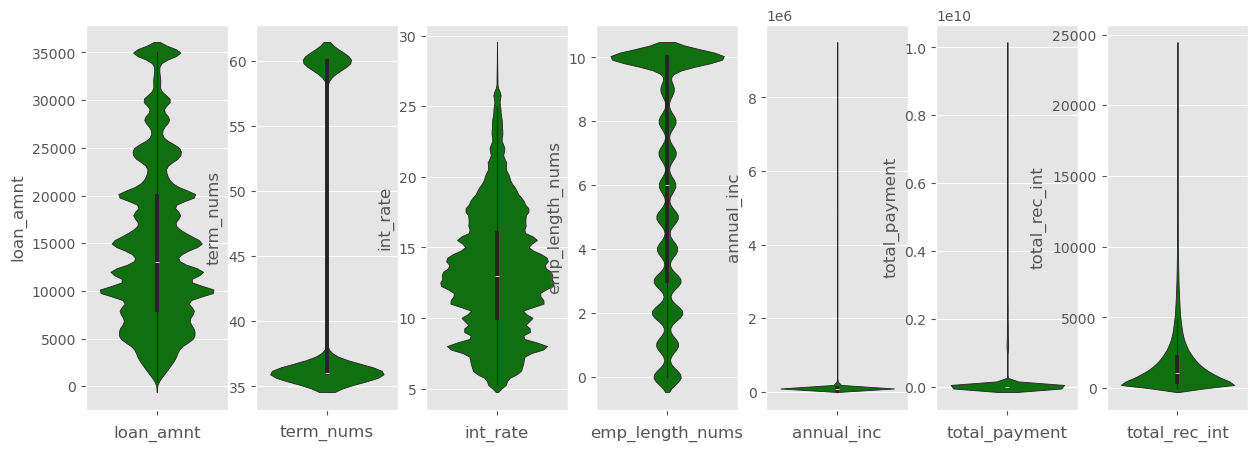

In [21]:
# Numericals Violinplot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    
plt.tight_layout
plt.show

C:\Users\Nadhifa Zahra\AppData\Local\Temp\ipykernel_56212\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\Nadhifa Zahra\AppData\Local\Temp\ipykernel_56212\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\Nadhifa Zahra\AppData\Local\Temp\ipykernel_56212\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\Nadhifa Zahra\AppData\Local\Temp\ipykernel_56212\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=

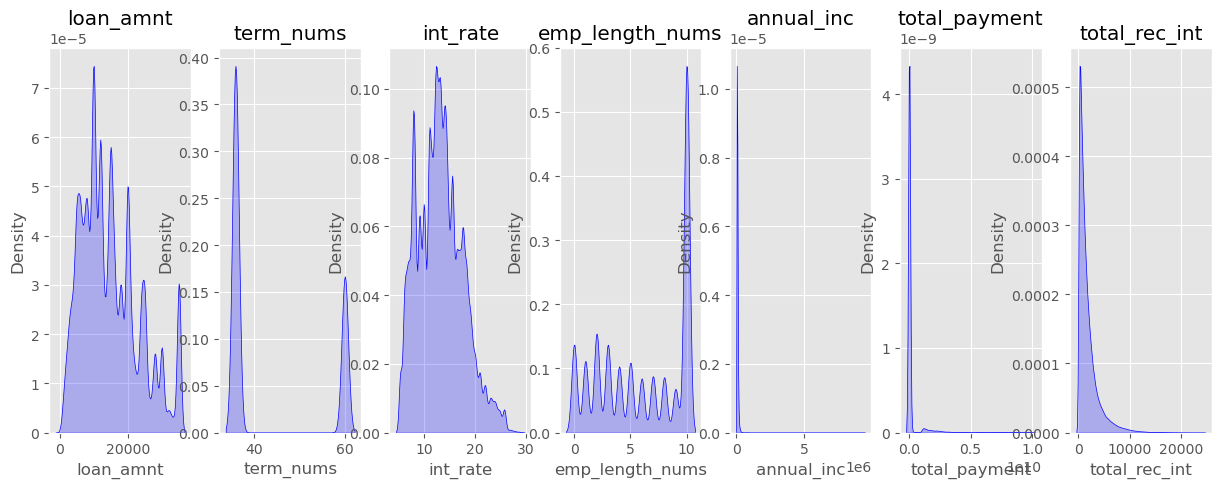

In [22]:
# Numericals KDE Plot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.kdeplot(df[nums[i]], color='blue', shade=True)
    plt.title(nums[i])
    
    plt.tight_layout
    plt.show

## Geo

<function matplotlib.pyplot.show(close=None, block=None)>

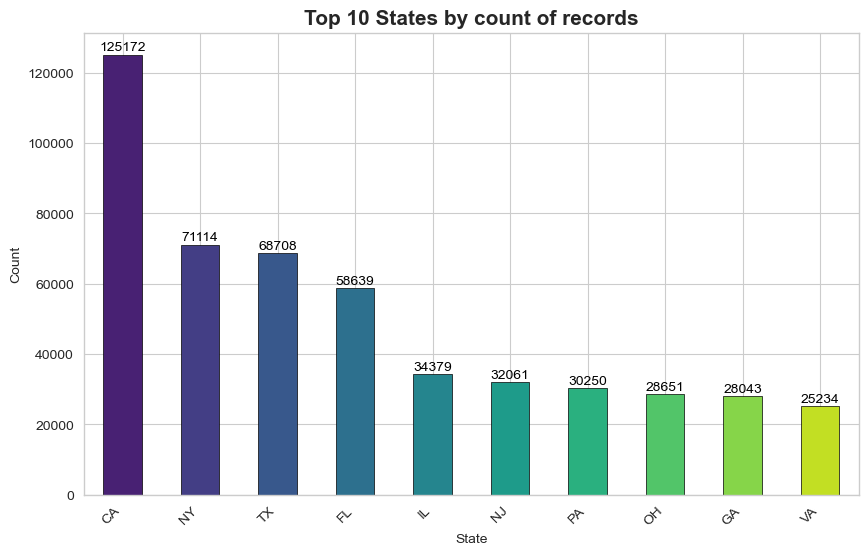

In [24]:
# Barplot for State

sns.set_style('whitegrid')
palette = sns.color_palette('viridis', 10)

plt.figure(figsize=(10,6))
ax = df['addr_state'].value_counts().head(10) \
    .plot(kind= 'bar', color= palette, edgecolor='black')

ax.set_title('Top 10 States by count of records', fontsize= 15, fontweight='bold')
ax.set_xlabel('State', fontsize=10)
ax.set_ylabel('Count', fontsize= 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), textcoords='offset points', 
        fontsize=10, color='black'
    )
    
plt.tight_layout
plt.show

In [25]:
df['zip_code'].value_counts().head(10)

zip_code
945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
100xx    7348
070xx    7143
331xx    7139
900xx    7022
770xx    6657
Name: count, dtype: int64

## Categoricals

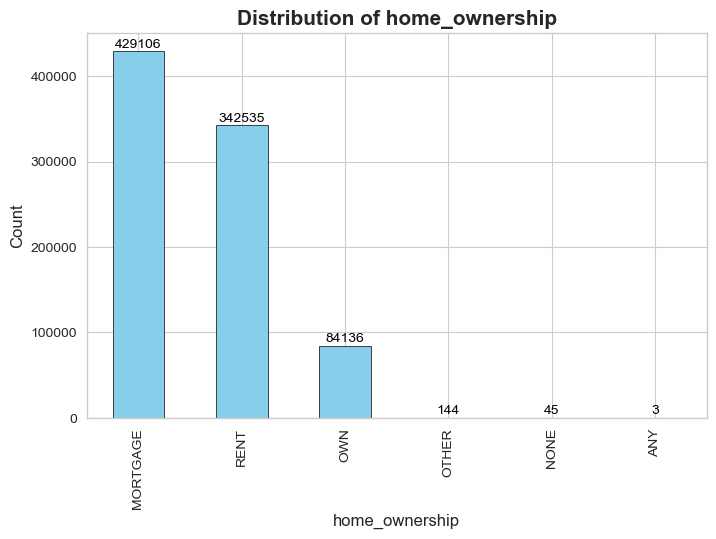

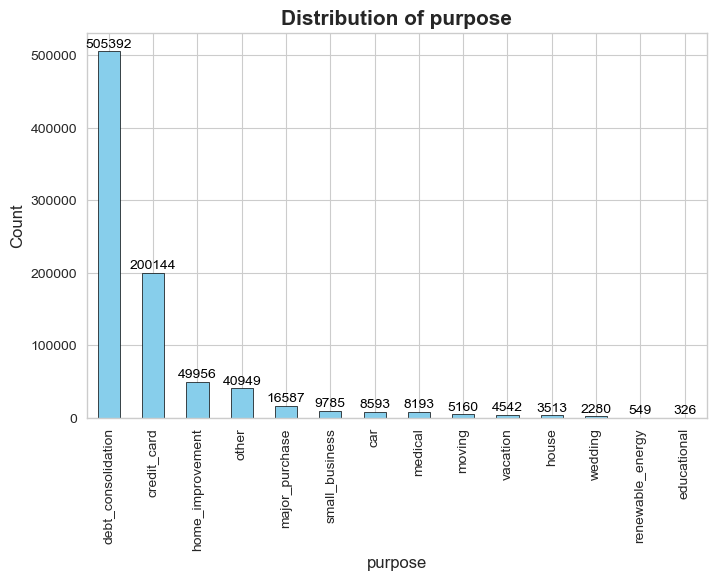

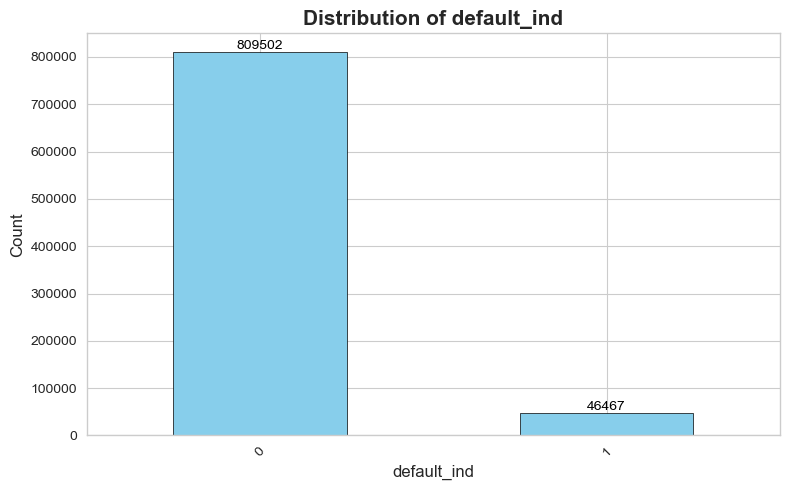

In [27]:
# Categorical values distribution

sns.set_style('whitegrid')

for cat in cats:
    plt.figure(figsize=(8,5))
    ax = df[cat].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    ax.set_title(f'Distribution of {cat}', fontsize=15, fontweight='bold')
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Display values on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points', 
                    fontsize=10, color='black')
        
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

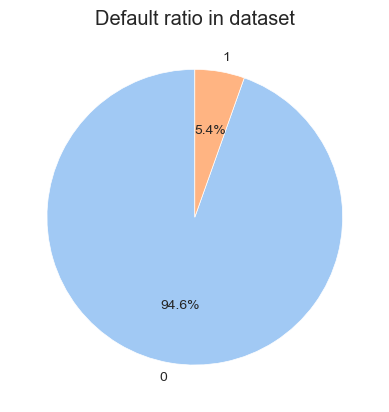

In [28]:
# Default Percentage represented in pie chart

df['default_ind'].value_counts().plot(kind='pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.title('Default ratio in dataset')
plt.ylabel('')
plt.show()

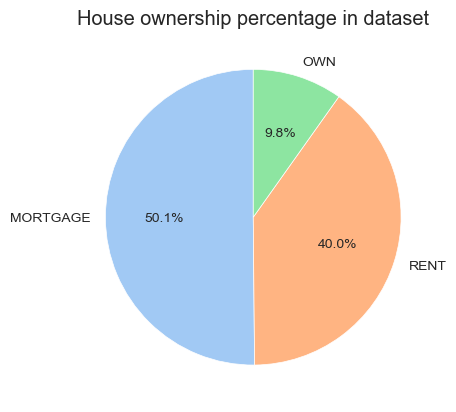

In [29]:
# House ownership status Percentage represented in pie chart

df['home_ownership'].value_counts().head(3).plot(kind='pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.title('House ownership percentage in dataset')
plt.ylabel('')
plt.show()

# 4. Feature Relationships

### Pairplot

In [32]:
#sns.pairplot(df, vars=nums)
#plt.show()

### Correlation Heatmap

In [34]:
# plt.figure(figsize=(15,8))
# sns.heatmap(df.dropna().corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
# plt.title("Correlation Heatmap")
# plt.show()

# 5. Data Cleansing

a. Outliers

Karena Objective dari projek ini adalah untuk memprediksi maka outliers akan kita remove dari dataset. Outlier ditentukan menggunakan Interquartile range dan diplot selanjutnya menggunakan Histogram KDE plot

In [36]:
df_cleaned = df.copy()

In [37]:
total_outliers_removed = 0

# Outlier del function
for col in nums:
    for i in range(2): 
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Hitung jumlah data sebelum penyaringan
        before_removal = df_cleaned.shape[0]
        # Saring data
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        # Hitung jumlah data setelah penyaringan dan outlier yang dihapus
        after_removal = df_cleaned.shape[0]
        total_outliers_removed += (before_removal - after_removal)

print(f"Bentuk data setelah menghapus outlier: {df_cleaned.shape}")
print(f"Total outlier yang dihapus: {total_outliers_removed}")

Bentuk data setelah menghapus outlier: (571240, 17)
Total outlier yang dihapus: 284729


Jumlah data yang diolah untuk 'loan_amnt': 571240
Jumlah data yang diolah untuk 'term_nums': 571240
Jumlah data yang diolah untuk 'int_rate': 571240
Jumlah data yang diolah untuk 'emp_length_nums': 571240
Jumlah data yang diolah untuk 'annual_inc': 571240
Jumlah data yang diolah untuk 'total_payment': 571240
Jumlah data yang diolah untuk 'total_rec_int': 571240


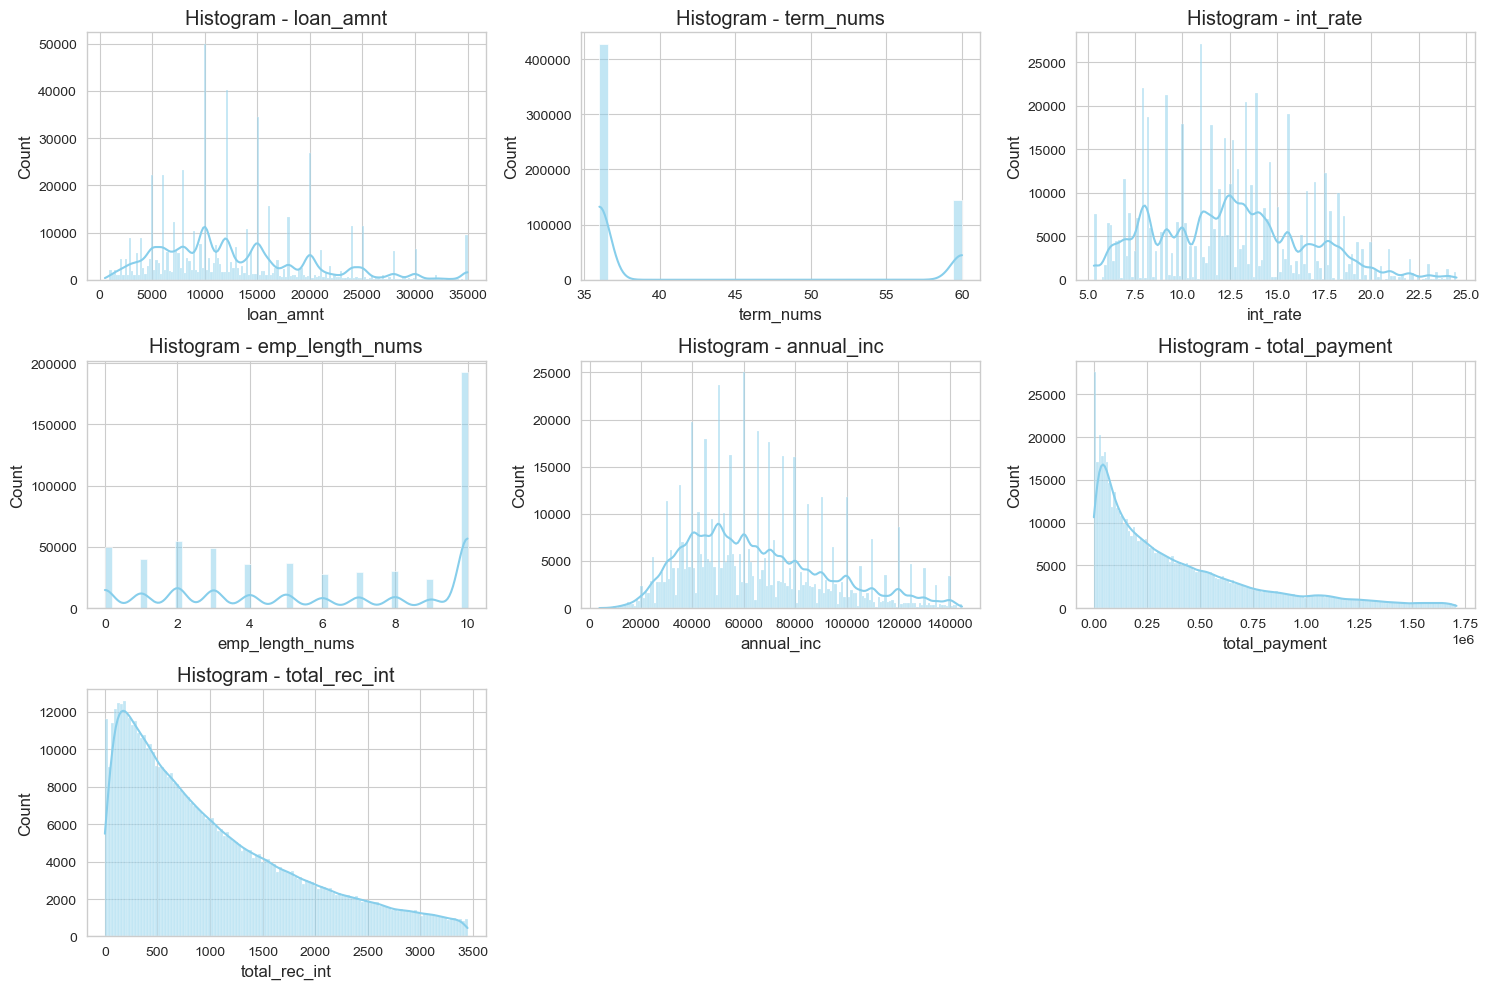

           loan_amnt      term_nums       int_rate  emp_length_nums  \
count  571240.000000  571240.000000  571240.000000    571240.000000   
mean    12790.459001      42.043484      12.556721         5.915536   
std      7256.098493      10.417299       3.958799         3.683954   
min       500.000000      36.000000       5.320000         0.000000   
25%      7500.000000      36.000000       9.170000         2.000000   
50%     11500.000000      36.000000      12.490000         6.000000   
75%     16175.000000      60.000000      14.990000        10.000000   
max     35000.000000      60.000000      24.500000        10.000000   

          annual_inc  total_payment  total_rec_int  
count  571240.000000   5.712400e+05  571240.000000  
mean    64792.640491   3.884844e+05    1022.914395  
std     27472.375533   3.847330e+05     834.133730  
min      3800.000000   0.000000e+00       0.000000  
25%     44000.000000   8.971400e+04     346.340000  
50%     60000.000000   2.598880e+05     79

In [38]:
for col in nums:
    print(f"Jumlah data yang diolah untuk '{col}': {len(df_cleaned[col].dropna())}")

# Histl=plot
plt.figure(figsize=(15, 10))  
for i, col in enumerate(nums, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)


if len(nums) < 9:  
    for j in range(len(nums) + 1, 10):  
        plt.subplot(3, 3, j).axis('off')  
plt.tight_layout()
plt.show()

# New Stats
print(df_cleaned[nums].describe())


b. Missing Values

In [40]:
df_cleaned = df_cleaned.dropna()

print("Shape before:", df.shape)
print("Shape after:", df_cleaned.shape)

Shape before: (855969, 17)
Shape after: (571240, 17)


# 6. Feature Engineering

In [42]:
## new feature montly debt
df_cleaned['monthlydebtperincome'] = (df_cleaned['loan_amnt'] / df_cleaned['term_nums']) / (df_cleaned['annual_inc'] / 12)
print(df_cleaned.head())

        id  member_id  loan_amnt       term  int_rate emp_length  \
1  1077430    1314167       2500  60 months     15.27   < 1 year   
4  1075358    1311748       3000  60 months     12.69     1 year   
6  1069639    1304742       7000  60 months     15.96    8 years   
8  1071795    1306957       5600  60 months     21.28    4 years   
9  1071570    1306721       5375  60 months     12.69   < 1 year   

  home_ownership  annual_inc             purpose zip_code addr_state  \
1           RENT     30000.0                 car    309xx         GA   
4           RENT     80000.0               other    972xx         OR   
6           RENT     47004.0  debt_consolidation    280xx         NC   
8            OWN     40000.0      small_business    958xx         CA   
9           RENT     15000.0               other    774xx         TX   

  total_pymnt  total_rec_int  default_ind  total_payment  term_nums  \
1     1008.71         435.17            1       100871.0       60.0   
4     3242.17   

In [43]:
# Menambahkan kolom baru 'payment_progress'
df_cleaned['payment_progress'] = (df_cleaned['total_payment'] - df_cleaned['total_rec_int']) / df_cleaned['loan_amnt']

print(df_cleaned.head())

        id  member_id  loan_amnt       term  int_rate emp_length  \
1  1077430    1314167       2500  60 months     15.27   < 1 year   
4  1075358    1311748       3000  60 months     12.69     1 year   
6  1069639    1304742       7000  60 months     15.96    8 years   
8  1071795    1306957       5600  60 months     21.28    4 years   
9  1071570    1306721       5375  60 months     12.69   < 1 year   

  home_ownership  annual_inc             purpose zip_code addr_state  \
1           RENT     30000.0                 car    309xx         GA   
4           RENT     80000.0               other    972xx         OR   
6           RENT     47004.0  debt_consolidation    280xx         NC   
8            OWN     40000.0      small_business    958xx         CA   
9           RENT     15000.0               other    774xx         TX   

  total_pymnt  total_rec_int  default_ind  total_payment  term_nums  \
1     1008.71         435.17            1       100871.0       60.0   
4     3242.17   

In [44]:
# Extract quartile_debt
df_cleaned['quartile_debt'] = pd.qcut(df_cleaned['monthlydebtperincome'], q=3, labels=['0', '1', '2'])
df_cleaned

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,total_pymnt,total_rec_int,default_ind,total_payment,term_nums,emp_length_nums,monthlydebtperincome,payment_progress,quartile_debt
1,1077430,1314167,2500,60 months,15.27,< 1 year,RENT,30000.0,car,309xx,GA,1008.71,435.17,1,100871.0,60.0,0.0,0.016667,40.174332,0
4,1075358,1311748,3000,60 months,12.69,1 year,RENT,80000.0,other,972xx,OR,3242.17,1009.07,0,324217.0,60.0,1.0,0.007500,107.735977,0
6,1069639,1304742,7000,60 months,15.96,8 years,RENT,47004.0,debt_consolidation,280xx,NC,8136.84,3025.99,0,813684.0,60.0,8.0,0.029785,115.808287,0
8,1071795,1306957,5600,60 months,21.28,4 years,OWN,40000.0,small_business,958xx,CA,646.02,294.94,1,64602.0,60.0,4.0,0.028000,11.483404,0
9,1071570,1306721,5375,60 months,12.69,< 1 year,RENT,15000.0,other,774xx,TX,1476.19,533.42,1,147619.0,60.0,0.0,0.071667,27.364759,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,36 months,11.99,8 years,RENT,31000.0,debt_consolidation,905xx,CA,3971.88,1027.35,0,397188.0,36.0,8.0,0.107527,39.616065,2
855965,36441262,39152692,24000,36 months,11.99,10+ years,MORTGAGE,79000.0,home_improvement,072xx,NJ,9532.39,2465.65,0,953239.0,36.0,10.0,0.101266,39.615556,2
855966,36271333,38982739,13000,60 months,15.99,5 years,RENT,35000.0,debt_consolidation,378xx,TN,3769.74,1925.24,0,376974.0,60.0,5.0,0.074286,28.849905,2
855967,36490806,39222577,12000,60 months,19.99,1 year,RENT,64400.0,debt_consolidation,010xx,MA,3787.67,2234.98,0,378767.0,60.0,1.0,0.037267,31.377668,0


In [45]:
# progress_payment to remaining_payment

df_cleaned['remaining_payment'] = 1 - df_cleaned['payment_progress']

df_cleaned

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,...,total_pymnt,total_rec_int,default_ind,total_payment,term_nums,emp_length_nums,monthlydebtperincome,payment_progress,quartile_debt,remaining_payment
1,1077430,1314167,2500,60 months,15.27,< 1 year,RENT,30000.0,car,309xx,...,1008.71,435.17,1,100871.0,60.0,0.0,0.016667,40.174332,0,-39.174332
4,1075358,1311748,3000,60 months,12.69,1 year,RENT,80000.0,other,972xx,...,3242.17,1009.07,0,324217.0,60.0,1.0,0.007500,107.735977,0,-106.735977
6,1069639,1304742,7000,60 months,15.96,8 years,RENT,47004.0,debt_consolidation,280xx,...,8136.84,3025.99,0,813684.0,60.0,8.0,0.029785,115.808287,0,-114.808287
8,1071795,1306957,5600,60 months,21.28,4 years,OWN,40000.0,small_business,958xx,...,646.02,294.94,1,64602.0,60.0,4.0,0.028000,11.483404,0,-10.483404
9,1071570,1306721,5375,60 months,12.69,< 1 year,RENT,15000.0,other,774xx,...,1476.19,533.42,1,147619.0,60.0,0.0,0.071667,27.364759,2,-26.364759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,36 months,11.99,8 years,RENT,31000.0,debt_consolidation,905xx,...,3971.88,1027.35,0,397188.0,36.0,8.0,0.107527,39.616065,2,-38.616065
855965,36441262,39152692,24000,36 months,11.99,10+ years,MORTGAGE,79000.0,home_improvement,072xx,...,9532.39,2465.65,0,953239.0,36.0,10.0,0.101266,39.615556,2,-38.615556
855966,36271333,38982739,13000,60 months,15.99,5 years,RENT,35000.0,debt_consolidation,378xx,...,3769.74,1925.24,0,376974.0,60.0,5.0,0.074286,28.849905,2,-27.849905
855967,36490806,39222577,12000,60 months,19.99,1 year,RENT,64400.0,debt_consolidation,010xx,...,3787.67,2234.98,0,378767.0,60.0,1.0,0.037267,31.377668,0,-30.377668


In [46]:
df_cleaned.drop(columns=['payment_progress'], inplace=True)
df_cleaned

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,total_pymnt,total_rec_int,default_ind,total_payment,term_nums,emp_length_nums,monthlydebtperincome,quartile_debt,remaining_payment
1,1077430,1314167,2500,60 months,15.27,< 1 year,RENT,30000.0,car,309xx,GA,1008.71,435.17,1,100871.0,60.0,0.0,0.016667,0,-39.174332
4,1075358,1311748,3000,60 months,12.69,1 year,RENT,80000.0,other,972xx,OR,3242.17,1009.07,0,324217.0,60.0,1.0,0.007500,0,-106.735977
6,1069639,1304742,7000,60 months,15.96,8 years,RENT,47004.0,debt_consolidation,280xx,NC,8136.84,3025.99,0,813684.0,60.0,8.0,0.029785,0,-114.808287
8,1071795,1306957,5600,60 months,21.28,4 years,OWN,40000.0,small_business,958xx,CA,646.02,294.94,1,64602.0,60.0,4.0,0.028000,0,-10.483404
9,1071570,1306721,5375,60 months,12.69,< 1 year,RENT,15000.0,other,774xx,TX,1476.19,533.42,1,147619.0,60.0,0.0,0.071667,2,-26.364759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,36 months,11.99,8 years,RENT,31000.0,debt_consolidation,905xx,CA,3971.88,1027.35,0,397188.0,36.0,8.0,0.107527,2,-38.616065
855965,36441262,39152692,24000,36 months,11.99,10+ years,MORTGAGE,79000.0,home_improvement,072xx,NJ,9532.39,2465.65,0,953239.0,36.0,10.0,0.101266,2,-38.615556
855966,36271333,38982739,13000,60 months,15.99,5 years,RENT,35000.0,debt_consolidation,378xx,TN,3769.74,1925.24,0,376974.0,60.0,5.0,0.074286,2,-27.849905
855967,36490806,39222577,12000,60 months,19.99,1 year,RENT,64400.0,debt_consolidation,010xx,MA,3787.67,2234.98,0,378767.0,60.0,1.0,0.037267,0,-30.377668


In [47]:
# age_group emp_length

# Fungsi untuk mengubah emp_length menjadi angka
def convert_emp_length(value):
    if isinstance(value, str):
        value = value.strip()  # Menghapus spasi ekstra
        if '< 1 year' in value:
            return 0  # Untuk '< 1 year'
        elif '10+ years' in value:
            return 10  # Untuk '10+ years'
        elif 'year' in value:
            return int(value.split(' ')[0])  # Mengambil angka sebelum kata 'year'
    return None

# Menerapkan fungsi pada kolom 'emp_length' dan menambahkan kolom baru 'emp_length_numeric'
df_cleaned['emp_length_numeric'] = df_cleaned['emp_length'].apply(convert_emp_length)

# Hitung kuartil Q1, Q2 (median), dan Q3
Q1 = df_cleaned['emp_length_numeric'].quantile(0.25)
Q2 = df_cleaned['emp_length_numeric'].quantile(0.5)
Q3 = df_cleaned['emp_length_numeric'].quantile(0.75)

# Tentukan batas untuk kuartil Q1, Q2, dan Q3
print(f"Q1 (25%): {Q1}, Q2 (50%): {Q2}, Q3 (75%): {Q3}")

# Membuat kolom 'age_group' untuk kategori kuartil
def assign_age_group(value):
    if value <= Q1:
        return 0  # Kuartil pertama
    elif value <= Q2:
        return 1  # Kuartil kedua
    elif value <= Q3:
        return 2  # Kuartil ketiga
    else:
        return None  # Abaikan kuartil keempat

# Terapkan fungsi untuk membuat kolom 'age_group'
df_cleaned['age_group'] = df_cleaned['emp_length_numeric'].apply(assign_age_group)

df_cleaned


Q1 (25%): 2.0, Q2 (50%): 6.0, Q3 (75%): 10.0


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,...,total_rec_int,default_ind,total_payment,term_nums,emp_length_nums,monthlydebtperincome,quartile_debt,remaining_payment,emp_length_numeric,age_group
1,1077430,1314167,2500,60 months,15.27,< 1 year,RENT,30000.0,car,309xx,...,435.17,1,100871.0,60.0,0.0,0.016667,0,-39.174332,0,0
4,1075358,1311748,3000,60 months,12.69,1 year,RENT,80000.0,other,972xx,...,1009.07,0,324217.0,60.0,1.0,0.007500,0,-106.735977,1,0
6,1069639,1304742,7000,60 months,15.96,8 years,RENT,47004.0,debt_consolidation,280xx,...,3025.99,0,813684.0,60.0,8.0,0.029785,0,-114.808287,8,2
8,1071795,1306957,5600,60 months,21.28,4 years,OWN,40000.0,small_business,958xx,...,294.94,1,64602.0,60.0,4.0,0.028000,0,-10.483404,4,1
9,1071570,1306721,5375,60 months,12.69,< 1 year,RENT,15000.0,other,774xx,...,533.42,1,147619.0,60.0,0.0,0.071667,2,-26.364759,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,36 months,11.99,8 years,RENT,31000.0,debt_consolidation,905xx,...,1027.35,0,397188.0,36.0,8.0,0.107527,2,-38.616065,8,2
855965,36441262,39152692,24000,36 months,11.99,10+ years,MORTGAGE,79000.0,home_improvement,072xx,...,2465.65,0,953239.0,36.0,10.0,0.101266,2,-38.615556,10,2
855966,36271333,38982739,13000,60 months,15.99,5 years,RENT,35000.0,debt_consolidation,378xx,...,1925.24,0,376974.0,60.0,5.0,0.074286,2,-27.849905,5,1
855967,36490806,39222577,12000,60 months,19.99,1 year,RENT,64400.0,debt_consolidation,010xx,...,2234.98,0,378767.0,60.0,1.0,0.037267,0,-30.377668,1,0
